In [5]:
from google.colab import files
files.upload()

Saving cars.csv to cars.csv


{'cars.csv': b',mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb\r\nMazda RX4,21,6,160,110,3.9,2.62,16.46,0,1,4,4\r\nMazda RX4 Wag,21,6,160,110,3.9,2.875,17.02,0,1,4,4\r\nDatsun 710,22.8,4,108,93,3.85,2.32,18.61,1,1,4,1\r\nHornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1\r\nHornet Sportabout,18.7,8,360,175,3.15,3.44,17.02,0,0,3,2\r\nValiant,18.1,6,225,105,2.76,3.46,20.22,1,0,3,1\r\nDuster 360,14.3,8,360,245,3.21,3.57,15.84,0,0,3,4\r\nMerc 240D,24.4,4,146.7,62,3.69,3.19,20,1,0,4,2\r\nMerc 230,22.8,4,140.8,95,3.92,3.15,22.9,1,0,4,2\r\nMerc 280,19.2,6,167.6,123,3.92,3.44,18.3,1,0,4,4\r\nMerc 280C,17.8,6,167.6,123,3.92,3.44,18.9,1,0,4,4\r\nMerc 450SE,16.4,8,275.8,180,3.07,4.07,17.4,0,0,3,3\r\nMerc 450SL,17.3,8,275.8,180,3.07,3.73,17.6,0,0,3,3\r\nMerc 450SLC,15.2,8,275.8,180,3.07,3.78,18,0,0,3,3\r\nCadillac Fleetwood,10.4,8,472,205,2.93,5.25,17.98,0,0,3,4\r\nLincoln Continental,10.4,8,460,215,3,5.424,17.82,0,0,3,4\r\nChrysler Imperial,14.7,8,440,230,3.23,5.345,17.42,0,0,3,4\r\nFiat 128,32

In [9]:
import pandas as pd
import numpy as np
from scipy import stats
df=pd.read_csv("cars.csv")
print(df.sample())
#df.info()
coef,p_value=stats.pearsonr(df["cyl"],df["mpg"]) # 상관관계 계산법
print(coef)
print(p_value) # 아주 강한 음의 상관관계가 있더라...

    Unnamed: 0   mpg  cyl   disp   hp  drat    wt  qsec  vs  am  gear  carb
31  Volvo 142E  21.4    4  121.0  109  4.11  2.78  18.6   1   1     4     2
-0.8521619594266132
6.112687142580972e-10


In [ ]:
# 이런 분석[상관관계 분석] 을 했다고 하면, cyl가지고 mpg 예측이 가능한가?
# 불가능.......
# 어떠한 수식적 관계가 있는지 설명이 없다. 
# Linear Regression: 예측을 하려면 수식이 있어야 한다. 



In [10]:
from sklearn.linear_model import LinearRegression as lm # 선형회귀 모형 부르는 것 

x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1)) # 열벡터로 바꿔주는 식 

# this array is required to be two-dimensional: one column and many rows 
print(x)
y = np.array([5, 20, 14, 32, 22, 38])
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]


In [12]:
model = lm() # 객체를 만든다?, 선형회귀 모형 객체를 만든다. 
# y=a+bx 형태의 모형을 만든다. 
# x 값이 있으면, 구한 a, 구한 b를 통해서 y를 예측/설명하겠다. 
model.fit(x, y) # Training, 우리의 모형은 y=a+bx로 표현 된식 
print('intercept:', model.intercept_) # a
print('slope:', model.coef_) # b
r_sq = model.score(x, y) # 적합도: 얼마나 잘설명하는지 적합도 R-square 
print(r_sq)

new_model = lm().fit(x, y.reshape((-1, 1))) # yf를 칼럼벡터로 바꿔도 결과는 동일 
print('intercept:', new_model.intercept_)
print('slope:', new_model.coef_)


#y= 5.633+ 0.54x 
# 설명력은 72% 정도 된다. 

intercept: 5.633333333333329
slope: [0.54]
0.7158756137479542


In [14]:
# 진짜 하려는 것, 상관관계에서 못하는 것: 예측 
y_pred = model.predict(x) # 현재 x값에서 예측 
print('predicted response:', y_pred)
x_new = np.arange(5).reshape((-1, 1)) # 새로운 x값을 만들고 
print(x_new)
y_new = model.predict(x_new) # 새로운 x값을 바탕으로 예측 
print(y_new)



predicted response: [ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]
[[0]
 [1]
 [2]
 [3]
 [4]]
[5.63333333 6.17333333 6.71333333 7.25333333 7.79333333]


In [17]:
# 다변량 케이스 
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x = np.array(x)
print(x)
# 모형: y=a+b1x1+b2x2
y = np.array(y)
print(y)
model = lm()
model.fit(x, y)
print('intercept:', model.intercept_) #a
print('slope:', model.coef_) # b1, b2 
r_sq = model.score(x, y)
print(r_sq)
y_pred = model.predict(x) # 원래 x값 예측
print('predicted response:', y_pred)
x_new = np.arange(10).reshape((-1, 2)) # 새로운 x값에서 예측 
print(x_new)
y_new = model.predict(x_new)
print(y_new)

# y = 5.522+0.44706965x1+ 0.25502548x2, fit과정후 결과값 
# x1은 x 행렬의 첫번째 열 
# x2는 x 행렬의 두번째 열 

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
[ 4  5 20 14 32 22 38 43]
intercept: 5.52257927519819
slope: [0.44706965 0.25502548]
0.8615939258756776
predicted response: [ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


In [18]:
# 보기좋은 선형회귀 모형. 통계학적 관점에서 회귀 모형 
import statsmodels.api as sm # 이름부터 statmodels!
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)
x = sm.add_constant(x) # sklearn default가 상수항고려, statmodels에서는 default가 상수항 없음
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())
print('coefficient of determination:', results.rsquared)
print('regression coefficients:', results.params)
print('predicted response:', results.fittedvalues, sep='\n')
print('predicted response:', results.predict(x), sep='\n')


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Mon, 24 Apr 2023   Prob (F-statistic):            0.00713
Time:                        01:08:28   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [19]:
x_new = sm.add_constant(np.arange(10).reshape((-1, 2)))
print(x_new)
y_new = results.predict(x_new)
print(y_new)

[[1. 0. 1.]
 [1. 2. 3.]
 [1. 4. 5.]
 [1. 6. 7.]
 [1. 8. 9.]]
[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


In [21]:
from  sklearn.metrics import mean_squared_error
from  sklearn.metrics import r2_score

# generate random data-set
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)

# Model initialization
regression_model = lm()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = np.sqrt(mean_squared_error(y, y_predicted)) # 표준편차와 동일, 스케일 표준화 
r2 = r2_score(y, y_predicted)

print(rmse)

0.2761036867351649


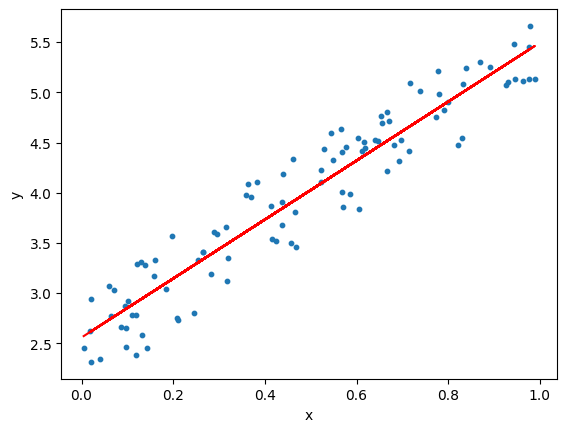

In [23]:
# plotting values
import matplotlib.pyplot as plt


# data points
plt.scatter(x, y, s=10) # 파란색 산포도
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='r') # 예측값을 연결해서 그리면 
plt.show()


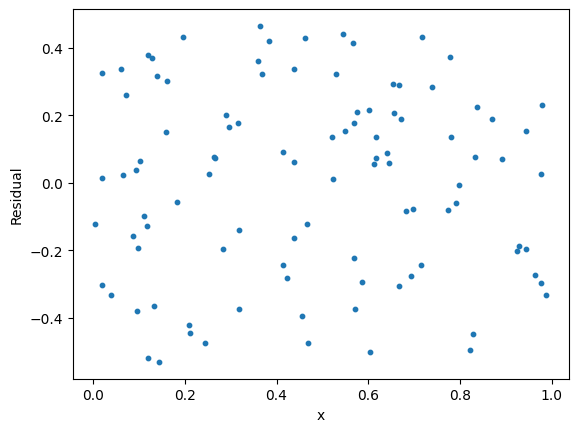

In [24]:
# residual values
y_resid=y-y_predicted
plt.scatter(x, y_resid, s=10)
plt.xlabel('x')
plt.ylabel('Residual')
plt.show()


In [25]:
# 선형회귀 모형 Full Version 
#Visualization Libraries
import seaborn as sns # 그래픽 
import matplotlib.pyplot as plt

#imports from sklearn library

from sklearn import datasets
from sklearn.linear_model import LinearRegression as lm
from sklearn.model_selection import train_test_split, cross_val_score # 설명 필요 
from sklearn.metrics import mean_squared_error # 예측오차제곱의 평균 



In [29]:
import numpy as np
import pandas as pd
#loading the dataset direclty from sklearn
data_url = ""
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
